In [1]:
import pandas_datareader as pdr
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import math

In [87]:
start = datetime.datetime(2017, 1, 1)
end = datetime.datetime(2021, 3, 31)

In [2]:
close_df = pd.read_csv('./data/sp500_close.csv', index_col='Date')

In [3]:
df = close_df["2020-01-01":]

In [4]:
df.index = pd.to_datetime(df.index)
df = df.resample('M').last()

In [5]:
log_df = np.log(df)-np.log(df.shift())

In [6]:
log_df = log_df[log_df.columns[~log_df.loc["2021-01-01":].isnull().any()]]

In [ ]:
log_df

In [7]:
cov = log_df.cov().to_numpy()
mu = log_df.mean().to_numpy()

In [8]:
cov_inv = np.linalg.inv(cov)

In [9]:
alpha = mu.dot(cov_inv).dot(mu)
beta = np.sum(cov_inv.dot(mu))
gamma = np.sum(cov_inv)
D = alpha*gamma - beta**2

In [10]:
def std(v):
    return math.sqrt((gamma*v**2 - 2*beta*v + alpha) / D)

In [11]:
_x = math.sqrt(1/gamma)
_y = beta/gamma

In [52]:
y_l = np.linspace(_y, 2, 100).tolist()
#y_l = np.linspace(-0.2, 0.2, 100).tolist()
x_l = [std(x) for x in y_l]

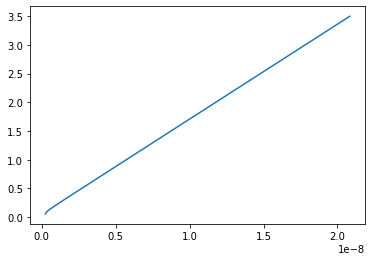

In [30]:
plt.plot(x_l, y_l)

In [16]:
_x

2.4339177219982744e-10

In [17]:
_y

0.05582678463167039

In [37]:
df = pd.read_csv("./data/TBILL.csv", index_col='DATE')

In [38]:
#df = df['2020-01-01':]

In [39]:
rf_ret = np.log(df*0.01+1).mean().values[0]

In [40]:
rf_ret

0.012379591733893199

In [41]:
E = alpha - 2*beta *rf_ret + gamma*rf_ret**2

In [42]:
def CML(risk):
    return rf_ret + math.sqrt(E)*risk

In [299]:
line_x = np.linspace(0, 1, 1000).tolist()
line_y = [CML(x) for x in line_x]

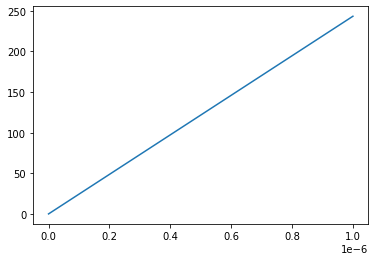

In [73]:
plt.plot(line_x, line_y)

In [129]:
sig_M = math.sqrt(E)/ (beta - rf_ret*gamma)
mu_M = rf_ret + E / (beta - rf_ret*gamma)

(0.0, 0.2)

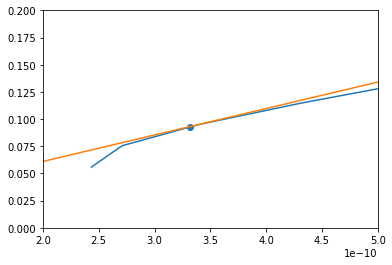

In [259]:
plt.plot(x_l, y_l)
plt.plot(line_x, line_y)
plt.scatter(sig_M, mu_M)
plt.xlim((0.0000000002, 0.0000000005))
plt.ylim((0.0, 0.2))

#plt.show()
#plt.xlim(())

In [133]:
rf_ret

0.012379591733893199

In [131]:
slope = (mu_M - rf_ret)/ sig_M

In [132]:
slope

243291934.9625565

In [266]:
A=100000000000
_x = slope/A
_y = slope*_x + rf_ret
util = _y - (A/2)*_x**2

In [269]:
util

295954.8404687158

In [267]:
_x

0.002432919349625565

In [268]:
A/2*_x**2 + _y

887864.496646964

In [270]:
_y = slope*_x + rf_ret

In [271]:
_y

591909.6685578399

In [272]:
def indiff(util, std_p, A=1):
    return util + (A/2) *(std_p**2)

In [300]:
x_i = np.linspace(0, 1, 1000).tolist()
y_i = [indiff(util, x, A) for x in x_i]

In [274]:
util

295954.8404687158

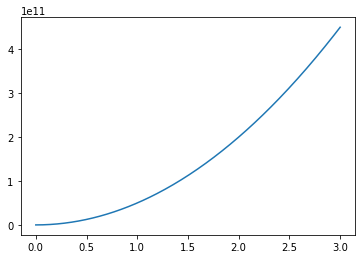

In [275]:
plt.plot(x_i, y_i)

(0.0, 1000000.0)

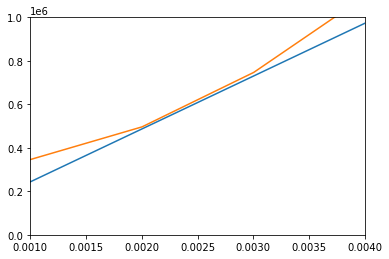

In [306]:
plt.plot(line_x, line_y)
plt.plot(x_i, y_i)
plt.xlim((0.001, 0.004))
plt.ylim((0, 1000000))

In [298]:
rf_ret

0.012379591733893199

(30000.0, 600000.0)

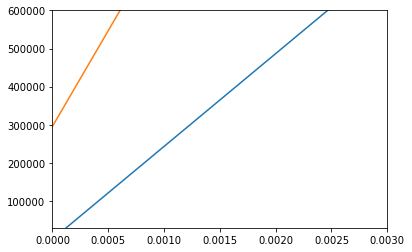

In [282]:
plt.plot(line_x, line_y)
plt.plot(x_i, y_i)
plt.xlim(0.0, 0.003)
plt.ylim(30000, 600000)

(0.0, 0.5)

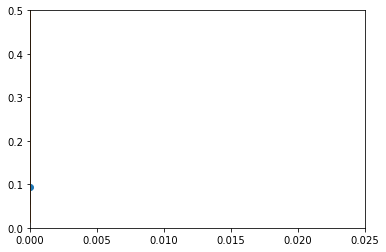

In [252]:
plt.plot(x_l, y_l)
plt.plot(line_x, line_y)
plt.scatter(sig_M, mu_M)
plt.plot(x_i, y_i)
#plt.xlim((0.0000000002, 0.0000000005))
#plt.xlim((0.000000000, 0.00000001))
#plt.ylim((0.0, 0.5))
plt.xlim((0, 0.025))
plt.ylim((, 0.5))

In [106]:
import yfinance as yf

In [126]:
data = yf.download("SPY AAPL", start, end)

[*********************100%***********************]  2 of 2 completed


In [128]:
data

Adj Close                   Close                    High  \
                  AAPL         SPY        AAPL         SPY        AAPL   
Date                                                                     
2017-01-03   27.459938  208.213501   29.037500  225.240005   29.082500   
2017-01-04   27.429203  209.452240   29.004999  226.580002   29.127501   
2017-01-05   27.568691  209.285812   29.152500  226.399994   29.215000   
2017-01-06   27.876030  210.034561   29.477501  227.210007   29.540001   
2017-01-09   28.131361  209.341278   29.747499  226.460007   29.857500   
...                ...         ...         ...         ...         ...   
2021-03-24  120.089996  387.519989  120.089996  387.519989  122.900002   
2021-03-25  120.589996  389.700012  120.589996  389.700012  121.660004   
2021-03-26  121.209999  395.980011  121.209999  395.980011  121.480003   
2021-03-29  121.389999  395.779999  121.389999  395.779999  122.580002   
2021-03-30  119.900002  394.730011  119.900002  394.730011  120.400002   

                               Low                    Open              \
                   SPY        AAPL         SPY        AAPL         SPY   
Date                                                                     
2017-01-03  225.830002   28.690001  223.880005   28.950001  225.039993   
2017-01-04  226.750000   28.937500  225.610001   28.962500  225.619995   
2017-01-05  226.580002   28.952499  225.479996   28.980000  226.270004   
2017-01-06  227.750000   29.117500  225.899994   29.195000  226.529999   
2017-01-09  227.070007   29.485001  226.419998   29.487499  226.910004   
...                ...         ...         ...         ...         ...   
2021-03-24  392.750000  120.070000  387.470001  122.820000  391.000000   
2021-03-25  390.549988  119.000000  383.899994  119.540001  385.980011   
2021-03-26  396.410004  118.919998  390.290009  120.349998  390.929993   
2021-03-29  396.750000  120.730003  392.809998  121.650002  394.399994   
2021-03-30  395.450012  118.860001  393.019989  120.110001  394.420013   

               Volume             
                 AAPL        SPY  
Date                              
2017-01-03  115127600   91366500  
2017-01-04   84472400   78744400  
2017-01-05   88774400   78379000  
2017-01-06  127007600   71559900  
2017-01-09  134247600   46939700  
...               ...        ...  
2021-03-24   88530500   97588600  
2021-03-25   98844700  116128600  
2021-03-26   93958900  113023400  
2021-03-29   80819200  108107600  
2021-03-30   85671900   76262200  

[1067 rows x 12 columns]

In [111]:
pdr.get_quote_yahoo(['AAPL', 'SPY'])

,language,region,quoteType,quoteSourceName,triggerable,currency,preMarketChange,preMarketChangePercent,preMarketTime,preMarketPrice,...,exchangeTimezoneShortName,gmtOffSetMilliseconds,market,esgPopulated,marketState,displayName,price,ytdReturn,trailingThreeMonthReturns,trailingThreeMonthNavReturns
AAPL,en-US,US,EQUITY,Nasdaq Real Time Price,True,USD,-0.080002,-0.059926,1619081487,133.42,...,EDT,-14400000,us_market,False,PRE,Apple,133.50,NaN,NaN,NaN
SPY,en-US,US,ETF,Nasdaq Real Time Price,True,USD,-0.470001,-0.112962,1619081543,415.60,...,EDT,-14400000,us_market,False,PRE,NaN,416.07,6.15,6.35,6.15
